importing the required libraries 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Importing the famous Mnist data 

In [29]:
(xtrain,_),(xtest,_) = tf.keras.datasets.mnist.load_data()

In [39]:
xtrain.shape

(60000, 28, 28)

In [40]:
xtest.shape

(10000, 28, 28)

plotting some of the images 

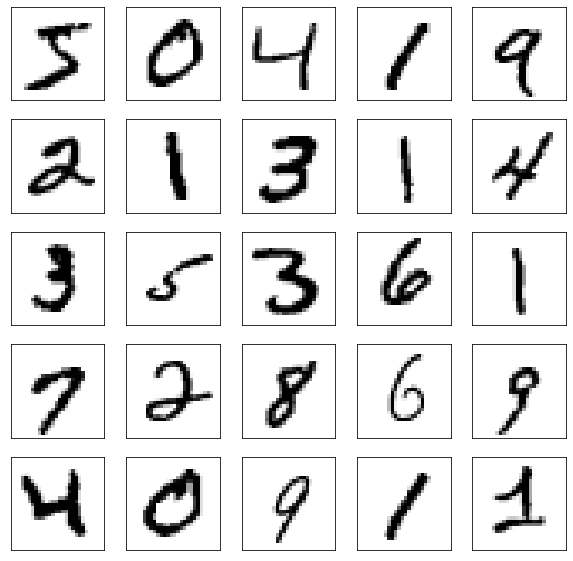

In [41]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap=plt.cm.binary)
plt.show()

Normalizing the images 

In [42]:
xtrain = xtrain.astype("float32")/255
xtest = xtest.astype("float32")/255

coverting images into 1-D array to provide them to the model 

In [43]:
xtrain = xtrain.reshape((len(xtrain),xtrain[0].reshape(-1).shape[0]))

In [44]:
xtest = xtest.reshape((len(xtest),xtest[0].reshape(-1).shape[0]))

In [45]:
xtrain.shape

(60000, 784)

In [46]:
xtest.shape

(10000, 784)

Here We are creating a deep autoencoder 

In [58]:
def autoencoder(encoded_dim,original_dim):
    #input layer with no: of neurons= shape of the input
    input_layer = tf.keras.layers.Input(shape=(original_dim,))
    
    #1st encoding layer with 132 neurons and activation as relu
    encoded1 = tf.keras.layers.Dense(132,activation = "relu")(input_layer)
    
    #2nd encoding layer with 64 neurons and activation as relu
    encoded2 = tf.keras.layers.Dense(64,activation = "relu")(encoded1)
    
    #encoded input
    bottle_neck = tf.keras.layers.Dense(encoded_dim,activation = "relu")(encoded2)
    
    #1st decoding layer with 64 neurons and activation as relu
    decoded1 = tf.keras.layers.Dense(64,activation = "relu")(bottle_neck)
    
    #2nd encoding layer with 132 neurons and activation as relu
    decoded2 = tf.keras.layers.Dense(132,activation = "relu")(decoded1)
    
    #output latyer with gives the reconstructed image
    output_layer = tf.keras.layers.Dense(original_dim,activation="sigmoid")(decoded2)
    
    #making the complete model
    autoencoder = tf.keras.Model(input_layer,output_layer)
    
    
    #making a seprate encoder(with taked original image as input)
    def encoder(input_layer,bottle_neck): 
        encoder = tf.keras.Model(input_layer,bottle_neck)
        return encoder
    
    #making a seprate decoder function which takes encoded image as input
    def decoder(encoded_dim,original_dim,autoencoder):
        input_layer = tf.keras.layers.Input(shape=((encoded_dim,)))
        decoded1 = autoencoder.layers[-3](input_layer)
        decoded2 = autoencoder.layers[-2](decoded1)
        output_layer = autoencoder.layers[-1](decoded2)
        decoder = tf.keras.Model(input_layer,output_layer)
        return decoder
    
    encoder = encoder(input_layer,bottle_neck)
    decoder = decoder(encoded_dim,original_dim,autoencoder)
    
    return autoencoder,encoder,decoder

In [59]:
autoencoder,encoder,decoder = autoencoder(32,784)

compiling the model 

In [60]:
autoencoder.compile(optimizer="adam",loss = tf.keras.losses.binary_crossentropy,metrics=["accuracy"])

training the model 

In [17]:
autoencoder.fit(xtrain,xtrain,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1482 - accuracy: 0.0109
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1083 - accuracy: 0.0124
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0993 - accuracy: 0.0125
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0950 - accuracy: 0.0136
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0923 - accuracy: 0.0141
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0903 - accuracy: 0.0139
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.0147
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.0138
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0868 - accuracy: 0.0137
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.086

trying autoencoder on some test images 

In [22]:
encoded = encoder.predict(xtest[:25])

In [23]:
decoded = decoder.predict(encoded)

## Reconstructed images

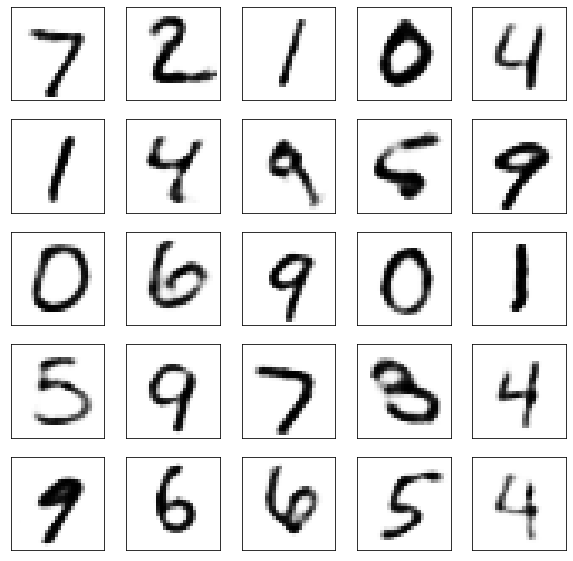

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(decoded[i].reshape((28,28)),cmap=plt.cm.binary)
plt.show()

## Original Images 

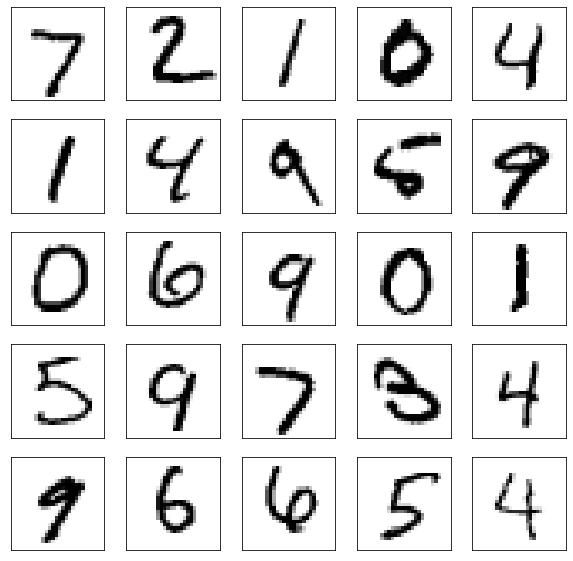

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtest[i].reshape((28,28)),cmap=plt.cm.binary)
plt.show()

# Denoising autoencoder

In [74]:
noisyxtrain = xtrain+(0.3*np.random.randn(xtrain.shape[0],xtrain.shape[1]))

In [77]:
noisyxtest = xtest+(0.3*np.random.randn(xtest.shape[0],xtest.shape[1]))

In [79]:
history = autoencoder.fit(noisyxtrain,xtrain,epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1001 - accuracy: 0.0137
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0977 - accuracy: 0.0142
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0971 - accuracy: 0.0132
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0967 - accuracy: 0.0137
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0964 - accuracy: 0.0135
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0962 - accuracy: 0.0138
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0960 - accuracy: 0.0144
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0959 - accuracy: 0.0137
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0957 - accuracy: 0.0138
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.095

In [80]:
img = encoder.predict(noisyxtest[:25].reshape((25,784)))

In [81]:
reconstructed = decoder.predict(img)

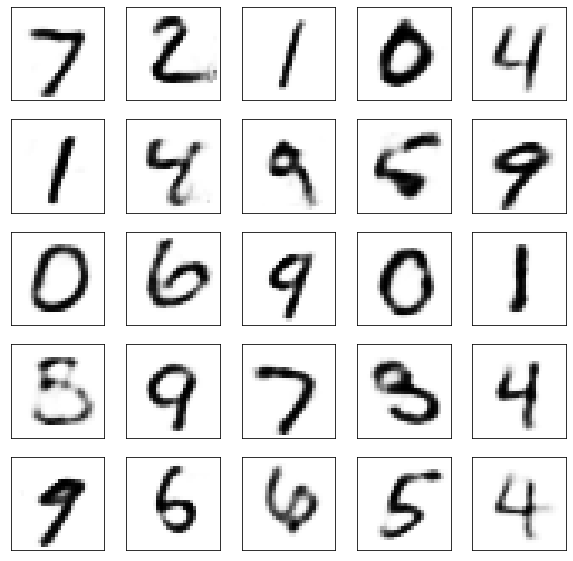

In [82]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(reconstructed[i].reshape((28,28)),cmap=plt.cm.binary)
plt.show()

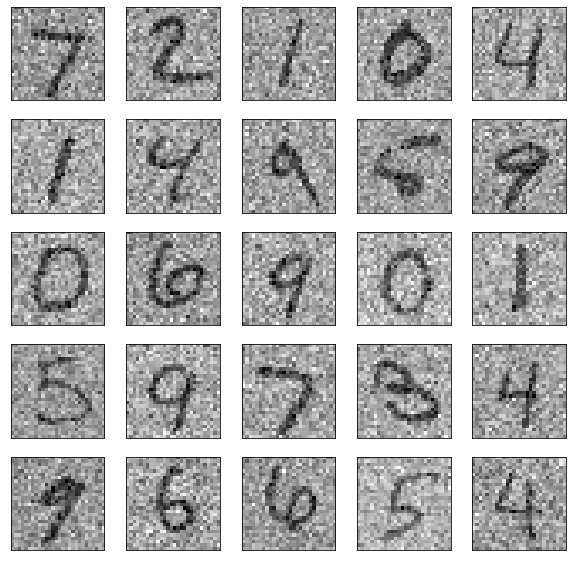

In [78]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(noisyxtest[i].reshape((28,28)),cmap=plt.cm.binary)
plt.show()